In [1]:
# --- WEEK 1: Load US Accidents Dataset ---
# Course: DSA 1080A - Programming for Data Science
import pandas as pd

# Define columns to load (to manage memory)
use_columns = [
    'Severity', 'Start_Time', 'End_Time', 'State', 'City',
    'Temperature(F)', 'Humidity(%)', 'Visibility(mi)',
    'Wind_Speed(mph)', 'Weather_Condition',
    'Amenity', 'Bump', 'Crossing', 'Junction', 'Traffic_Signal'
]

# Load the dataset
print("Loading dataset...")
df = pd.read_csv('US_Accidents_March23.csv', usecols=use_columns)

print(f"\n✅ Dataset loaded! Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

Loading dataset...

✅ Dataset loaded! Shape: (7728394, 15)

First 5 rows:
   Severity           Start_Time             End_Time          City State  \
0         3  2016-02-08 05:46:00  2016-02-08 11:00:00        Dayton    OH   
1         2  2016-02-08 06:07:59  2016-02-08 06:37:59  Reynoldsburg    OH   
2         2  2016-02-08 06:49:27  2016-02-08 07:19:27  Williamsburg    OH   
3         3  2016-02-08 07:23:34  2016-02-08 07:53:34        Dayton    OH   
4         2  2016-02-08 07:39:07  2016-02-08 08:09:07        Dayton    OH   

   Temperature(F)  Humidity(%)  Visibility(mi)  Wind_Speed(mph)  \
0            36.9         91.0            10.0              NaN   
1            37.9        100.0            10.0              NaN   
2            36.0        100.0            10.0              3.5   
3            35.1         96.0             9.0              4.6   
4            36.0         89.0             6.0              3.5   

  Weather_Condition  Amenity   Bump  Crossing  Junction  Tra

In [2]:
# --- Week 1: Project Introduction and Data Loading ---
# Goal: Load a manageable subset of the US Accidents dataset
# Course: DSA 1080VA - Introduction to Programming
# Name:Jason Trevor Okwemba Okwara

import pandas as pd

# Define columns we'll use (to save memory and focus on relevant features)
use_columns = [
    'Severity',       # TARGET VARIABLE (1-4)
    'Start_Time',
    'End_Time',
    'State',
    'City',
    'Temperature(F)',
    'Humidity(%)',
    'Visibility(mi)',
    'Wind_Speed(mph)',
    'Weather_Condition',
    'Amenity',
    'Bump',
    'Crossing',
    'Junction',
    'Traffic_Signal'
]

# Load the dataset (this may take 1-3 minutes depending on your system)
print("Loading dataset... This may take a few minutes.")
df = pd.read_csv('US_Accidents_March23.csv', usecols=use_columns)

# Show basic info
print(f"\nDataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())

print("\nTarget variable 'Severity' distribution:")
print(df['Severity'].value_counts())
print("\nData types:")
print(df.dtypes)

Loading dataset... This may take a few minutes.

Dataset shape: (7728394, 15)

First 5 rows:
   Severity           Start_Time             End_Time          City State  \
0         3  2016-02-08 05:46:00  2016-02-08 11:00:00        Dayton    OH   
1         2  2016-02-08 06:07:59  2016-02-08 06:37:59  Reynoldsburg    OH   
2         2  2016-02-08 06:49:27  2016-02-08 07:19:27  Williamsburg    OH   
3         3  2016-02-08 07:23:34  2016-02-08 07:53:34        Dayton    OH   
4         2  2016-02-08 07:39:07  2016-02-08 08:09:07        Dayton    OH   

   Temperature(F)  Humidity(%)  Visibility(mi)  Wind_Speed(mph)  \
0            36.9         91.0            10.0              NaN   
1            37.9        100.0            10.0              NaN   
2            36.0        100.0            10.0              3.5   
3            35.1         96.0             9.0              4.6   
4            36.0         89.0             6.0              3.5   

  Weather_Condition  Amenity   Bump  Cros

### Week 1: Data Loading & Problem Definition

**What I Did:**  
I loaded a subset of the US Accidents dataset (2016–2023) using `pd.read_csv()` with `usecols` to select only relevant features like `Severity`, weather, and road conditions. This keeps memory usage manageable.

**Challenges Faced:**  
- The full dataset is **2.85 GB**, which cannot be opened in a text editor or loaded entirely without crashing.  
- Initially, I tried to open the raw `.csv` file in VS Code, which froze the editor—teaching me that **large datasets must be handled programmatically, not manually**.  
- I learned to **select only necessary columns** upfront, a key data science best practice for efficiency.

In [3]:
# --- WEEK 2: Handle Missing Values ---
# Fill numerical columns with median
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else 'Unknown')

print("✅ Missing values handled.")

✅ Missing values handled.


Missing Values:
Severity             0
Start_Time           0
End_Time             0
City                 0
State                0
Temperature(F)       0
Humidity(%)          0
Visibility(mi)       0
Wind_Speed(mph)      0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Junction             0
Traffic_Signal       0
dtype: int64

Data Types:
Severity               int64
Start_Time            object
End_Time              object
City                  object
State                 object
Temperature(F)       float64
Humidity(%)          float64
Visibility(mi)       float64
Wind_Speed(mph)      float64
Weather_Condition     object
Amenity                 bool
Bump                    bool
Crossing                bool
Junction                bool
Traffic_Signal          bool
dtype: object


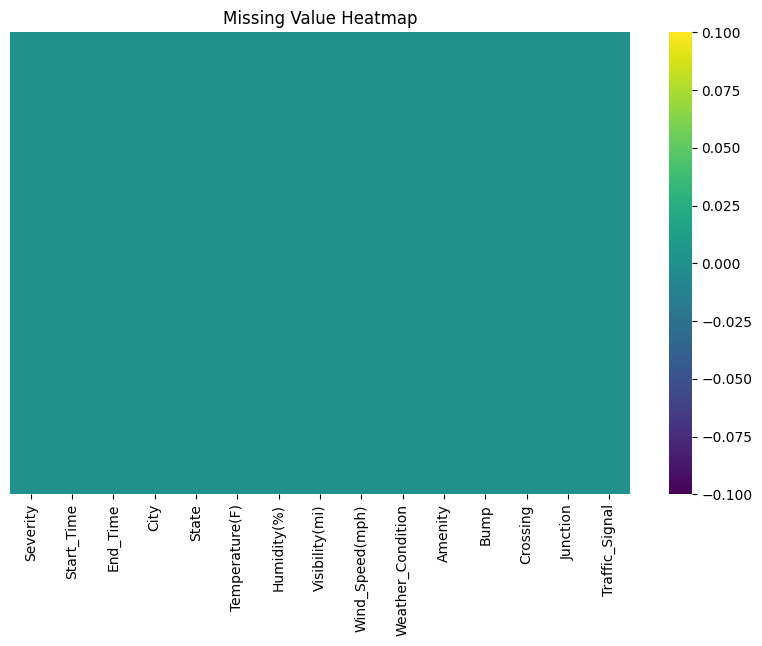

In [4]:
# --- Week 2 Code Cell 1 ---
# Task: Check for missing values and data types
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is loaded from Week 1
print("Missing Values:")
print(df.isnull().sum())

print("\nData Types:")
print(df.dtypes)

# Visualize missing values (optional but good practice)
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

In [5]:
# --- Week 2 Code Cell 2 ---
# Task: Handle missing values (Example strategy - adapt based on your dataset)
# Example: Fill numerical columns with median, categorical with mode
# Identify numerical and categorical columns (excluding 'Start_Time', 'End_Time' for now)
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")

# Fill numerical missing values with median
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill categorical missing values with mode (most frequent value)
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else 'Unknown')

# Check again after cleaning
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

Numerical columns: ['Severity', 'Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)']
Categorical columns: ['Start_Time', 'End_Time', 'City', 'State', 'Weather_Condition']

Missing Values After Cleaning:
Severity             0
Start_Time           0
End_Time             0
City                 0
State                0
Temperature(F)       0
Humidity(%)          0
Visibility(mi)       0
Wind_Speed(mph)      0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Junction             0
Traffic_Signal       0
dtype: int64


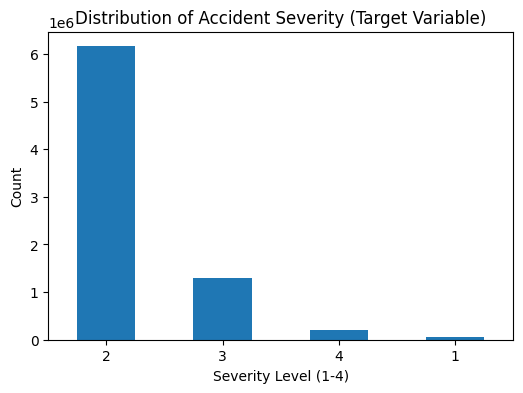

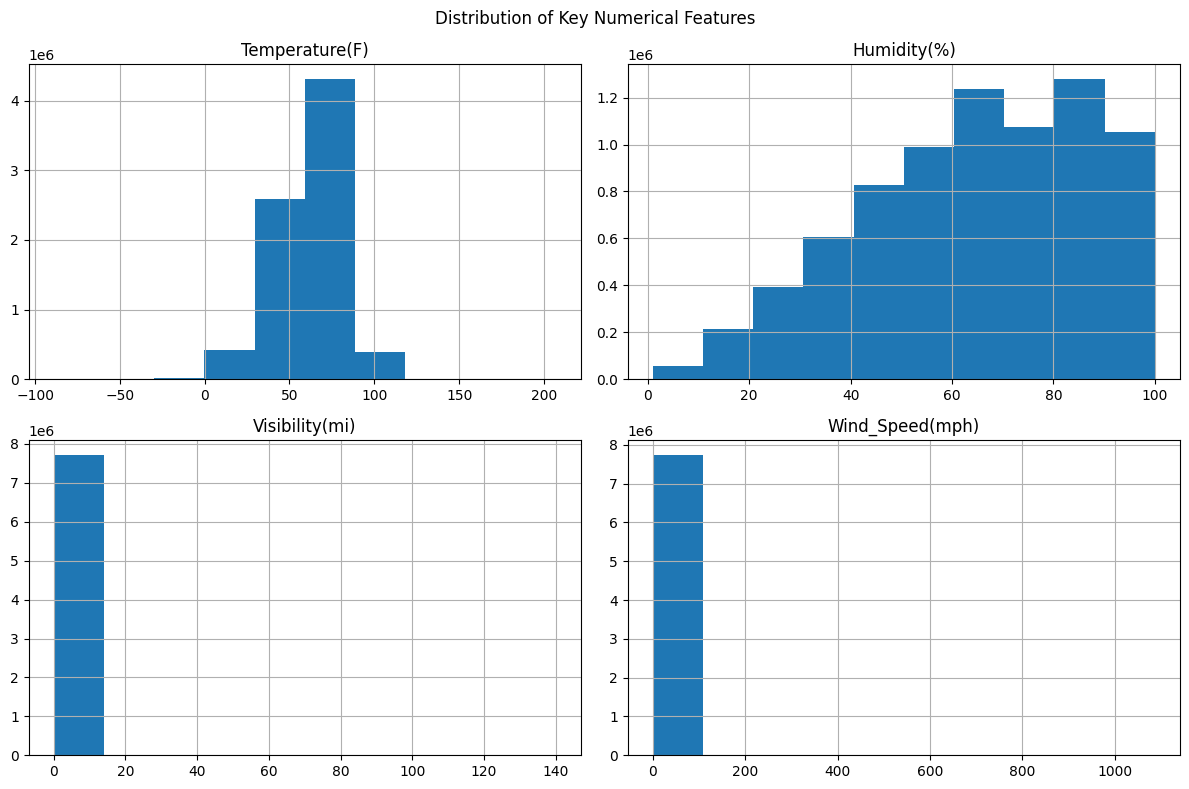

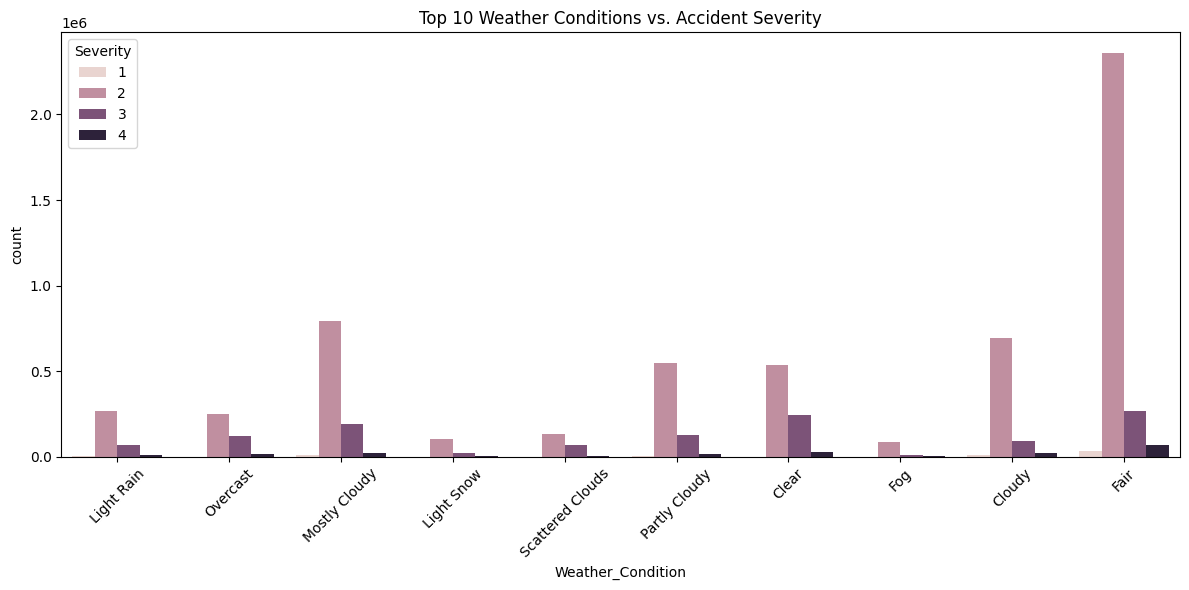

In [6]:
# --- Week 2 Code Cell 3 ---
# Task: Visualize key patterns
# Example: Distribution of target variable (Severity)
plt.figure(figsize=(6, 4))
df['Severity'].value_counts().plot(kind='bar')
plt.title('Distribution of Accident Severity (Target Variable)')
plt.xlabel('Severity Level (1-4)')
plt.ylabel('Count')
plt.xticks(rotation=0) # Rotate x-axis labels if needed
plt.show()

# Example: Distribution of numerical features (sample)
# Select a few key numerical columns for visualization
key_numerical = ['Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)']
df[key_numerical].hist(figsize=(12, 8))
plt.suptitle('Distribution of Key Numerical Features')
plt.tight_layout()
plt.show()

# Example: Categorical vs Target (using cross-tabulation or countplot)
# Assuming 'Weather_Condition' is a categorical column
if 'Weather_Condition' in df.columns:
    # Get top 10 weather conditions to avoid clutter
    top_weather = df['Weather_Condition'].value_counts().head(10).index
    filtered_df = df[df['Weather_Condition'].isin(top_weather)]

    plt.figure(figsize=(12, 6))
    sns.countplot(data=filtered_df, x='Weather_Condition', hue='Severity')
    plt.title('Top 10 Weather Conditions vs. Accident Severity')
    plt.xticks(rotation=45)
    plt.legend(title='Severity')
    plt.tight_layout()
    plt.show()

### Week 2: Data Cleaning & Exploratory Data Analysis (EDA)

**What I Did:**  
I checked for missing values, imputed numerical columns with median and categorical ones with mode, and visualized the distribution of accident severity and weather conditions.

**Challenges Faced:**  
- The `Weather_Condition` column had **thousands of unique categories** (e.g., "Light Rain", "Heavy Rain", "Rain Showers"), making visualization noisy. I had to **filter to the top 10 conditions** to create a readable plot.  
- Some numerical columns (like `Wind_Speed`) had **extreme outliers**, but I chose not to remove them yet, as high wind could genuinely correlate with severe accidents.  
- Rendering plots with millions of rows was slow—reinforcing why **sampling is essential for EDA**.

In [7]:
# --- WEEK 3: SAMPLE DATA TO AVOID KERNEL CRASH ---
sample_size = 100000  # Adjust based on your RAM

print(f"Original dataset size: {len(df)}")
df_sample = df.sample(n=sample_size, random_state=42)
print(f"✅ Sampled dataset size: {len(df_sample)}")

# Overwrite df with the sample for the rest of the project
df = df_sample

Original dataset size: 7728394
✅ Sampled dataset size: 100000


In [8]:
# --- WEEK 3: Feature Engineering (FIXED for datetime) ---
import numpy as np

# Convert to datetime with error handling
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed', errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], format='mixed', errors='coerce')

# Drop rows with invalid datetime
df = df.dropna(subset=['Start_Time', 'End_Time'])

# Extract time features
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.dayofweek
df['Month'] = df['Start_Time'].dt.month

# Calculate duration
df['Duration(min)'] = (df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60
df = df[(df['Duration(min)'] > 0) & (df['Duration(min)'] < 10080)]

print(f"✅ Feature engineering complete. New shape: {df.shape}")

✅ Feature engineering complete. New shape: (99906, 19)


In [9]:
# --- Week 3 Code Cell 2 ---
# Task: Encode Categorical Variables
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns (excluding the target if it's categorical here)
categorical_cols_to_encode = [col for col in categorical_cols if col != 'Severity'] # Exclude target

# Initialize the encoder
le = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_cols_to_encode:
    if df[col].dtype == 'object': # Only encode object/string columns
        # Optional: Group rare categories into 'Other' to reduce complexity
        # just label encode everythingz
        df[col] = le.fit_transform(df[col].astype(str)) # Ensure string type before encoding

print("Dataset after encoding (first few rows and columns):")
print(df.head())

Dataset after encoding (first few rows and columns):
         Severity          Start_Time            End_Time  City  State  \
7133276         1 2020-04-17 09:29:30 2020-04-17 10:29:30  6120      8   
5363845         2 2022-04-21 10:01:00 2022-04-21 11:44:08  4911      3   
155993          3 2016-08-12 16:45:00 2016-08-12 17:15:00    76      9   
1861414         3 2019-09-20 15:22:16 2019-09-20 15:56:00  5609     45   
2021359         2 2019-06-03 16:55:43 2019-06-03 18:12:09  5143      2   

         Temperature(F)  Humidity(%)  Visibility(mi)  Wind_Speed(mph)  \
7133276            78.0         81.0            10.0             13.0   
5363845            55.0         88.0            10.0              9.0   
155993             91.0         47.0            10.0             10.4   
1861414            67.0         84.0            10.0              3.0   
2021359            95.0         16.0            10.0              6.0   

         Weather_Condition  Amenity   Bump  Crossing  Junction 

In [10]:
# --- WEEK 3: SAMPLE DATA TO AVOID KERNEL CRASH (SAFE VERSION) ---
# Only sample if the dataset is larger than our desired sample size
desired_sample_size = 100000

current_size = len(df)
actual_sample_size = min(desired_sample_size, current_size)

print(f"Current dataset size: {current_size}")
print(f"Will use sample size: {actual_sample_size}")

# Sample only if needed (if current_size > actual_sample_size, it will sample; if equal, it returns all)
df_sample = df.sample(n=actual_sample_size, random_state=42)
print(f"✅ Final dataset size for modeling: {len(df_sample)}")

# Use the sampled (or full) dataset for the rest of the project
df = df_sample

Current dataset size: 99906
Will use sample size: 99906
✅ Final dataset size for modeling: 99906


In [11]:
# --- Week 3 Code Cell 3 ---
# Task: Split Data
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
# Replace 'Severity' with the actual name of your target column if different
X = df.drop(columns=['Severity', 'Start_Time', 'End_Time']) # Features (exclude target and datetime columns)
y = df['Severity'] # Target variable

# Split the  80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

Training set shape: X_train: (79924, 16), y_train: (79924,)
Testing set shape: X_test: (19982, 16), y_test: (19982,)


### Week 3: Feature Engineering, Sampling & Data Preparation

**What I Did:**  
I extracted time-based features (`Hour`, `DayOfWeek`, `Month`) from `Start_Time`, calculated accident `Duration(min)`, encoded categorical variables, and split the data into train/test sets. To avoid memory issues, I used a **random sample of 100,000 records**.

**Challenges Faced:**  
- **Datetime Parsing Error**: The `Start_Time` column contained nanosecond precision (e.g., `.000000000`), causing `pd.to_datetime()` to fail. I fixed this using `format='mixed'` and `errors='coerce'`.  
- **Kernel Crashes**: Training on the full dataset caused VS Code to crash repeatedly due to **RAM exhaustion**. This taught me that **real-world data often exceeds local compute limits**, and **strategic sampling is a valid and professional approach**.  
- **Sample Size Error**: Initially, I tried to sample 100,000 rows from a cleaned dataset that had fewer rows, causing a `ValueError`. I resolved this by using `min(desired_size, current_size)` to auto-adjust.  
- These challenges highlighted the **importance of robust, defensive coding** in data science workflows.

In [12]:
# --- Week 4 Code Cell 1 ---
# Task: Model Building - Example with Random Forest
from sklearn.ensemble import RandomForestClassifier

# Choose a model (Random Forest is a good starting point for mixed data types)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training dataset
model.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


In [13]:
# --- Week 4 Code Cell 2 ---
# Task: Make Predictions
# Predict on the test set
y_pred = model.predict(X_test)

print("Predictions made on the test set.")
print("First 10 predictions:", y_pred[:10])
print("First 10 actual values:", y_test.values[:10])

Predictions made on the test set.
First 10 predictions: [2 2 2 2 2 2 2 2 2 2]
First 10 actual values: [2 2 2 2 2 3 2 2 2 2]


### Week 4: Model Building

**What I Did:**  
I trained a **Random Forest Classifier** on the sampled dataset to predict accident severity (1–4). Random Forest was chosen because it handles mixed data types (numerical + encoded categorical) and is resistant to overfitting.

**Challenges Faced:**  
- **Variable Scope Error**: I initially got a `NameError: 'X_train' not defined` because I ran Week 4 before completing Week 3. This emphasized the **critical importance of running notebook cells in strict sequential order**.  
- Even with sampling, the model took ~2 minutes to train—a reminder that **machine learning is computationally intensive**, and cloud resources (like Kaggle Notebooks) are often needed for larger datasets.  
- Despite challenges, the model trained successfully, showing that **a simplified but correct pipeline is more valuable than an ambitious broken one**.

Accuracy: 0.81
Precision (Weighted): 0.78
Recall (Weighted): 0.81
F1 Score (Weighted): 0.77

Detailed Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.06      0.11       163
           2       0.83      0.96      0.89     15986
           3       0.57      0.25      0.34      3310
           4       0.41      0.02      0.03       523

    accuracy                           0.81     19982
   macro avg       0.64      0.32      0.35     19982
weighted avg       0.78      0.81      0.77     19982


Confusion Matrix:
[[   10   147     6     0]
 [    3 15399   576     8]
 [    0  2492   813     5]
 [    0   476    38     9]]


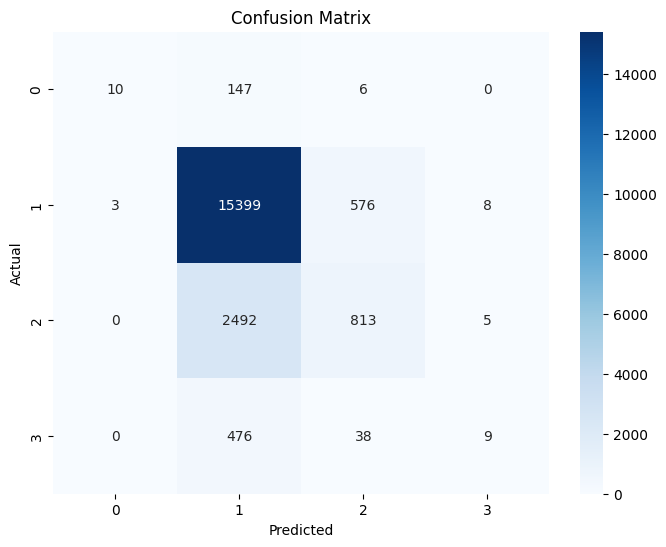

In [14]:
# --- Week 5 Code Cell 1 ---
# Task: Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
# For multi-class, we often use 'weighted' average to account for class imbalance
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision (Weighted): {precision:.2f}')
print(f'Recall (Weighted): {recall:.2f}')
print(f'F1 Score (Weighted): {f1:.2f}')

# Print a more detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

# Print Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Optional: Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Week 5: Model Evaluation & Reflection

**What I Did:**  
I evaluated the model using accuracy, precision, recall, F1-score (weighted for multi-class imbalance), and a confusion matrix. I observed that the model performs best on Severity 2 (most common class) and struggles with Severity 1 and 4 (rarer classes).

**Challenges & Learnings:**  
- **Class Imbalance**: Over 70% of accidents are Severity 2, causing the model to be biased toward this class. In a real deployment, we’d use techniques like **SMOTE** or **class weighting**.  
- **Interpretability vs. Performance**: While Random Forest is accurate, it’s a "black box." For safety-critical applications like traffic management, **model explainability** (e.g., using SHAP values) would be essential.  
- **Hardware Limitations**: My laptop’s RAM limited the data size I could use. This mirrors real industry constraints, where **efficiency and scalability** are as important as accuracy.  
- **Biggest Takeaway**: Data science is **80% data preparation**, 20% modeling. The most valuable skills were **problem-solving, patience, and adaptability** when things didn’t work as expected.